## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### เปิดไฟล์และทำความสะอาดข้อมูล

In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [129]:
# เปิดไฟล์ csv
df_63 = pd.read_csv("dataset/2563.csv")

# ลบลูกน้ำออก
df_63 = df_63.replace(',','', regex=True)

# เติมค่าว่างตั้งแต่หลักที่ 8 ให้เป็น 0
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].fillna("0")  

# เติมค่าว่างให้เป็น -
df_63 = df_63.fillna("-")  

# แปลงประเภทของข้อมูลให้เป็นตัวเลข
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].astype(float) 

C:\Users\NotOte\AppData\Local\Temp\ipykernel_22356\1831956958.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       38.7
1       75.5
2       75.5
3       75.5
4       20.7
        ... 
6267    35.5
6268    48.0
6269     0.0
6270    81.4
6271    70.4
Name: tarang_wa, Length: 6272, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_63.iloc[:, 8:] = df_63.iloc[:, 8:].fillna("0")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_22356\1831956958.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       438.7
1           0
2           0
3           0
4           0
        ...  
6267        0
6268        0
6269        0
6270        0
6271        0
Name: usage_agriculture, Length: 6272, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
 

In [130]:
# แสดงข้อมูล
df_63

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc
0,1,โฉนด,1181,1384,1441.0,01A002,1.0,0.0,38.7,438.7,438.7,0.0,0.0,0.0
1,2,โฉนด,1755,1386,1439.0,01A003,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
2,3,โฉนด,85625,37,4752.0,01A003/001,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
3,4,โฉนด,85626,38,4753.0,01A003/002,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
4,5,โฉนด,1402,1385,1440.0,01A004,0.0,1.0,20.7,0.0,0.0,120.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,6268,โฉนด,29141,2286,3562.0,06L022,0.0,3.0,35.5,0.0,0.0,335.5,0.0,0.0
6268,6269,โฉนด,29140,2478,3563.0,06L023,0.0,3.0,48.0,0.0,0.0,348.0,0.0,0.0
6269,6270,โฉนด,98537,219,4945.0,06L023/001,0.0,2.0,0.0,0.0,200.0,0.0,0.0,0.0
6270,6271,โฉนด,29139,2476,3574.0,06L024,0.0,3.0,81.4,0.0,0.0,0.0,381.4,0.0


#### จำแนกลักษณะการทำประโยชน์

In [131]:
# สร้างคอลัมม์ใหม่
df_63["type_of_usage"] = pd.Series([float('NaN')] * len(df_63))

In [132]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน ('พื้นที่ประกอบเกษตรกรรม', 'พื้นที่อยู่อาศัย', 'พื้นที่อื่น ๆ', 'พื้นที่ว่างเปล่า', 'พื้นที่ใช้ประโยชน์หลายประเภท' และ 'ไม่ทราบลักษณะการใช้')
df_63[df_63["usage_agriculture"] > 0] = df_63[df_63["usage_agriculture"] > 0].fillna("agriculture")
df_63[df_63["usage_living"] > 0] = df_63[df_63["usage_living"] > 0].fillna("living")
df_63[df_63["usage_other"] > 0] = df_63[df_63["usage_other"] > 0].fillna("other")
df_63[df_63["usage_none"] > 0] = df_63[df_63["usage_none"] > 0].fillna("wasteland")
df_63[df_63["usage_misc"] > 0] = df_63[df_63["usage_misc"] > 0].fillna("misc")        
df_63["type_of_usage"] = df_63["type_of_usage"].fillna("unknown")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_22356\3692351213.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_63[df_63["usage_agriculture"] > 0] = df_63[df_63["usage_agriculture"] > 0].fillna("agriculture")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_22356\3692351213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture'

In [133]:
# แสดงข้อมูลโดยจำแนกออกมาแค่ รหัสแปลงที่ดิน และ ลักษณะการใช้ประโยชน์
# พื้นที่ประกอบเกษตรกรรม : agriculture, พื้นที่อยู่อาศัย : living, พื้นที่อื่น ๆ : other, 
# พื้นที่ว่างเปล่า : wasteland, พื้นที่ใช้ประโยชน์หลายประเภท : misc และ ไม่ทราบลักษณะการใช้ : unknown

df_63[ ['location_id', 'type_of_usage'] ]

,location_id,type_of_usage
0,01A002,agriculture
1,01A003,living
2,01A003/001,living
3,01A003/002,living
4,01A004,other
...,...,...
6267,06L022,other
6268,06L023,other
6269,06L023/001,living
6270,06L024,wasteland


## วิเคราะห์ข้อมูลและรายงานผล

#### จากแบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2563 มีที่ดิน 736 ที่

In [134]:
land = len(df_63) 
land

6272

### ที่ดินสามารถจำแนกจากลักษณะการทำประโยชน์ 6 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์, ใช้ประโยชน์หลายประเภท และ ไม่ทราบลักษณะการใช้

#### มีพื้นที่ประกอบเกษตรกรรม 30 พื้นที่ คิดเป็น 4.0761 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [135]:
len(df_63[df_63["type_of_usage"] == "agriculture"])

190

In [136]:
(len(df_63[df_63["type_of_usage"] == "agriculture"]) / land) * 100  

3.0293367346938775

#### มีพื้นที่อยู่อาศัย 269 พื้นที่ คิดเป็น 36.5489 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [137]:
len(df_63[df_63["type_of_usage"] == "living"]) 

1694

In [138]:
len(df_63[df_63["type_of_usage"] == "living"]) / land * 100

27.00892857142857

#### มีพื้นที่อื่น ๆ 292 พื้นที่ คิดเป็น 39.6739 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [139]:
len(df_63[df_63["type_of_usage"] == "other"])

3463

In [140]:
len(df_63[df_63["type_of_usage"] == "other"]) / land * 100

55.213647959183675

#### มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 122 พื้นที่ คิดเป็น 16.5760 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [141]:
len(df_63[df_63["type_of_usage"] == "wasteland"])

806

In [142]:
len(df_63[df_63["type_of_usage"] == "wasteland"]) / land * 100

12.85076530612245

#### และมีพื้นที่ใช้ประโยชน์หลายประเภท 0 พื้นที่ คิดเป็น 0.0 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [143]:
len(df_63[df_63["type_of_usage"] == "misc"])

0

In [144]:
len(df_63[df_63["type_of_usage"] == "misc"]) / land * 100

0.0

#### และมีพื้นที่ไม่ทราบลักษณะการใช้ 23 พื้นที่ คิดเป็น 3.125 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [145]:
len(df_63[df_63["type_of_usage"] == "unknown"])

119

In [146]:
len(df_63[df_63["type_of_usage"] == "unknown"]) / land * 100

1.8973214285714284

#### จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

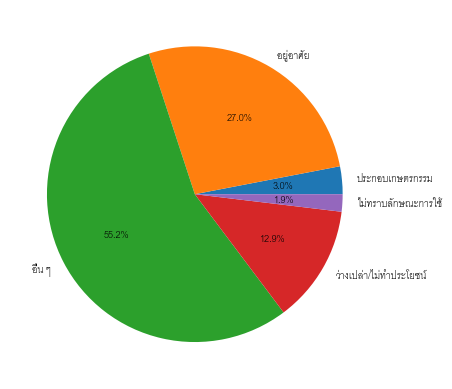

In [147]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Cordia New"
plt.rcParams["font.serif"] = "Cordia New"

# สร้างกราฟ
data = [ len(df_63[df_63["type_of_usage"] == "agriculture"]),
         len(df_63[df_63["type_of_usage"] == "living"]), 
         len(df_63[df_63["type_of_usage"] == "other"]), 
         len(df_63[df_63["type_of_usage"] == "wasteland"]),
         len(df_63[df_63["type_of_usage"] == "unknown"])
       ]
labels = ['ประกอบเกษตรกรรม','อยู่อาศัย ','อื่น ๆ','ว่างเปล่า/ไม่ทำประโยชน์', 'ไม่ทราบลักษณะการใช้'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

##  ข้อมูลเฉพาะลักษณะการใช้ประโยชน์แบบประกอบเกษตรกรรม

#### ดูข้อมูลทั้งหมด

In [148]:
df_63["type"] = df_63["type"].replace("-", "ไม่ระบุ")
agricultrue_land = df_63[df_63["type_of_usage"] == "agriculture"]
agricultrue_land

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
0,1,โฉนด,1181,1384,1441.0,01A002,1.0,0.0,38.7,438.7,438.7,0.0,0.0,0.0,agriculture
5,6,โฉนด,1758,1389,1438.0,01A005,2.0,1.0,8.7,908.7,0.0,0.0,0.0,0.0,agriculture
39,40,โฉนด,70207,1,4360.0,01A026/001,0.0,0.0,33.3,33.3,0.0,0.0,0.0,0.0,agriculture
67,68,โฉนด,72196,1411,-,01A044/002,0.0,0.0,84.1,84.1,0.0,0.0,0.0,0.0,agriculture
123,124,โฉนด,2823,289,1884.0,01B039,0.0,1.0,33.0,133.0,0.0,0.0,0.0,0.0,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,6166,โฉนด,130392,2762,5490.0,06K001/014,0.0,1.0,43.5,143.5,0.0,0.0,0.0,0.0,agriculture
6203,6204,โฉนด,134218,2117,5969.0,06K011/001,0.0,0.0,81.0,81.0,0.0,0.0,0.0,0.0,agriculture
6229,6230,โฉนด,24540,2281,3282.0,06K017,0.0,1.0,96.5,196.5,0.0,0.0,0.0,0.0,agriculture
6230,6231,โฉนด,24539,2280,3281.0,06K018,0.0,3.0,93.1,393.1,0.0,0.0,0.0,0.0,agriculture


#### จำนวนที่ดินที่ประกอบเกษตรกรรม

In [149]:
len(agricultrue_land) # 30 ที่

190

#### ดูข้อมูลทั้งหมดจำแนกแยกด้วยประเภท

In [150]:
df_63.groupby('type').size()

type
1862          1
น.ส.3         1
นสล           2
โฉนด       6263
ไม่ระบุ       5
dtype: int64

In [151]:
agricultrue_land.groupby('type').size()

# โฉนด 30 ที่

type
โฉนด    190
dtype: int64

#### สามารถดาวน์โหลดไฟล์ csv โดยการนำ '#' ออกและกดรันโปรแกรม

In [152]:
# df_63.to_csv('target/data2563.csv', index=False)

In [153]:
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].replace(0,'-')
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("agriculture", "ประกอบเกษตรกรรม")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("living", "อยู่อาศัย")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("other", "อื่น ๆ")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("misc", "ใช้ประโยชน์หลากหลาย")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("unknown", "ไม่ทราบลักษณะการใช้ ")

In [154]:
df_63 = df_63.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "usage_living" : "อยู่อาศัย (ตร.ว.)",
                    "usage_other" : "อื่น ๆ (ตร.ว.)",
                    "usage_none" : "ว่างเปล่า/ไม่ทำประโยชน์ (ตร.ว.)",
                    "usage_misc" : "ใช้ประโยชน์หลากหลาย (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [155]:
df_63[df_63["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2563/พื้นที่ประกอบเกษตรกรรม2563.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [156]:
df_63[df_63["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2563/พื้นที่ประกอบเกษตรกรรม2563.xlsx', index=False)

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [157]:
df_63[df_63["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_csv('../result/พื้นที่รกร้าง/2563/พื้นที่รกร้าง2563.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [158]:
df_63[df_63["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_excel('../result/พื้นที่รกร้าง/2563/พื้นที่รกร้าง2563.xlsx', index=False)

------

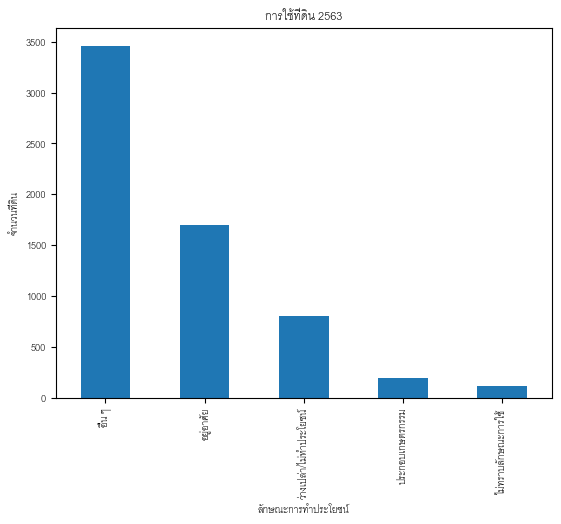

In [159]:
value_counts = df_63["ลักษณะการทำประโยชน์"].value_counts() 
value_counts.plot(kind="bar")
plt.title("การใช้ที่ดิน 2563")
plt.xlabel("ลักษณะการทำประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()